In this Jupyter notebook, we will focus on basic data analysis for building artificial intelligence models and constructing various models for predicting outcomes of a regression problem.

In [1]:
#Importing the necessary libraries for analysis and model building.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
#Lets see our data first
dataframe = pd.read_csv('./data/SalmonandSeaTroutNets1952-2022.csv')
dataframe.head(10)

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
5,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,April,4.0,4253.0,16522.1,...,5.4,1244.0,1413.4,0.0,0.0,0.0,0.0,0.0,0.0,31.0
6,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,May,5.0,754.0,3310.3,...,23.1,60.0,104.3,0.0,0.0,0.0,0.0,0.0,0.0,28.0
7,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,May,5.0,2370.0,9800.8,...,49.9,2689.0,3519.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
8,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,June,6.0,461.0,2190.9,...,427.7,80.0,126.1,0.0,0.0,0.0,0.0,0.0,0.0,29.0
9,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,June,6.0,2157.0,9948.6,...,2695.2,7286.0,11079.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0


In [3]:
#Printing informations about the data
print(dataframe.info())
print(dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [4]:
#Removing rows with missing data (3) - there are very few, so this won't significantly affect the model outcomes
dataframe = dataframe.dropna()
dataframe.isnull().values.any() #We can see that there are no missing values in the dataframe

False

In our dataset, we have many different types of fish along with their specific quantities. We should add a new column to our previously created 'Total number of fish' column(created first in classification problem), which contains the sum of all fish caught in a given period, to calculate the total weight of all caught fish. Then, we should add one more column to calculate the average of these two previous columns.

<Axes: xlabel='Year', ylabel='Total weight'>

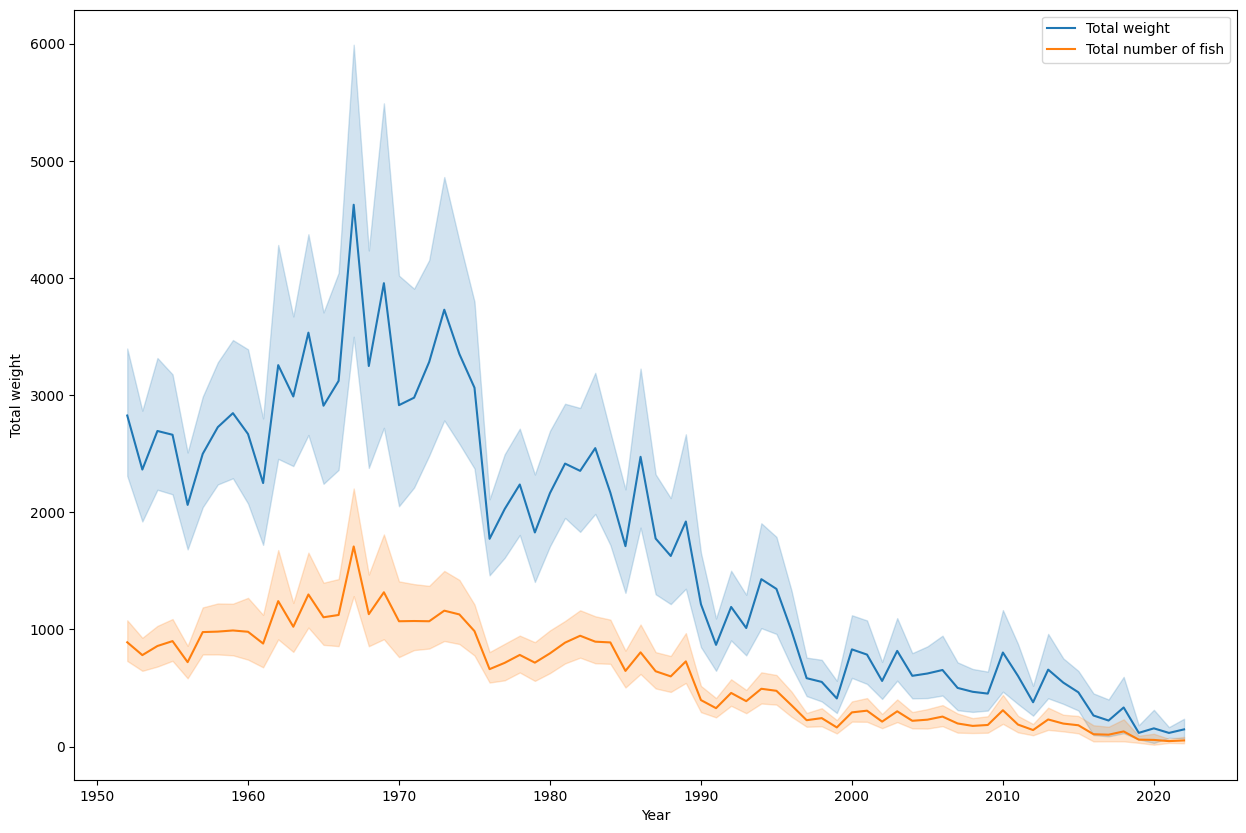

In [5]:
#Add the Total number of fish caught in each year
dataframe['Total number of fish'] = dataframe['Wild 1SW number'] + dataframe['Wild MSW number'] + dataframe['Sea trout number'] + dataframe['Finnock number'] + dataframe['Farmed 1SW number'] + dataframe['Farmed MSW number']
dataframe['Total weight'] = dataframe['Wild 1SW weight (kg)'] + dataframe['Wild MSW weight (kg)'] + dataframe['Sea trout weight (kg)'] + dataframe['Finnock weight (kg)'] + dataframe['Farmed 1SW weight (kg)'] + dataframe['Farmed MSW weight (kg)']
#Let's see on the plot how the total weight of fish caught in each year compares to their quantity
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='Year', y='Total weight', data=dataframe, ax=ax, label='Total weight')
sns.lineplot(x='Year', y='Total number of fish', data=dataframe, ax=ax, label='Total number of fish')

As an interesting observation, we can notice a decrease in the total weight of fish caught over the years, despite the decrease in the number of catches as well. This decline in fish weight is much more significant

<Axes: xlabel='Year', ylabel='Average weight'>

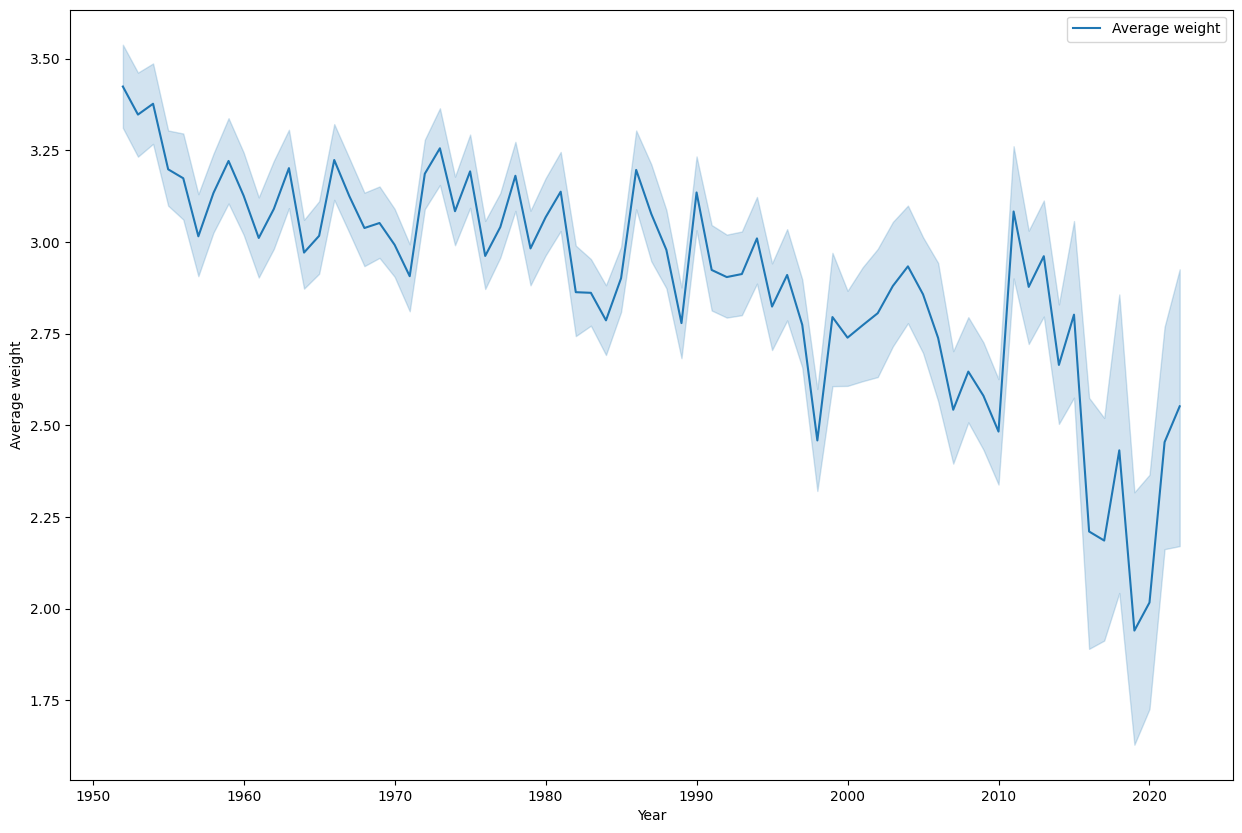

In [6]:
#Let's add a column with the average weight of a single fish and present it on a graph, where it will be evident that the weight of fish is decreasing
dataframe['Average weight'] = dataframe['Total weight'] / dataframe['Total number of fish']
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='Year', y='Average weight', data=dataframe, ax=ax, label='Average weight')

In [7]:
#Transforming the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

dataframe['District'] = LabelEncoder().fit_transform(dataframe['District'])
dataframe['Region'] = LabelEncoder().fit_transform(dataframe['Region'])
dataframe['Month'] = LabelEncoder().fit_transform(dataframe['Month'])
dataframe['Method'] = LabelEncoder().fit_transform(dataframe['Method'])

<Axes: >

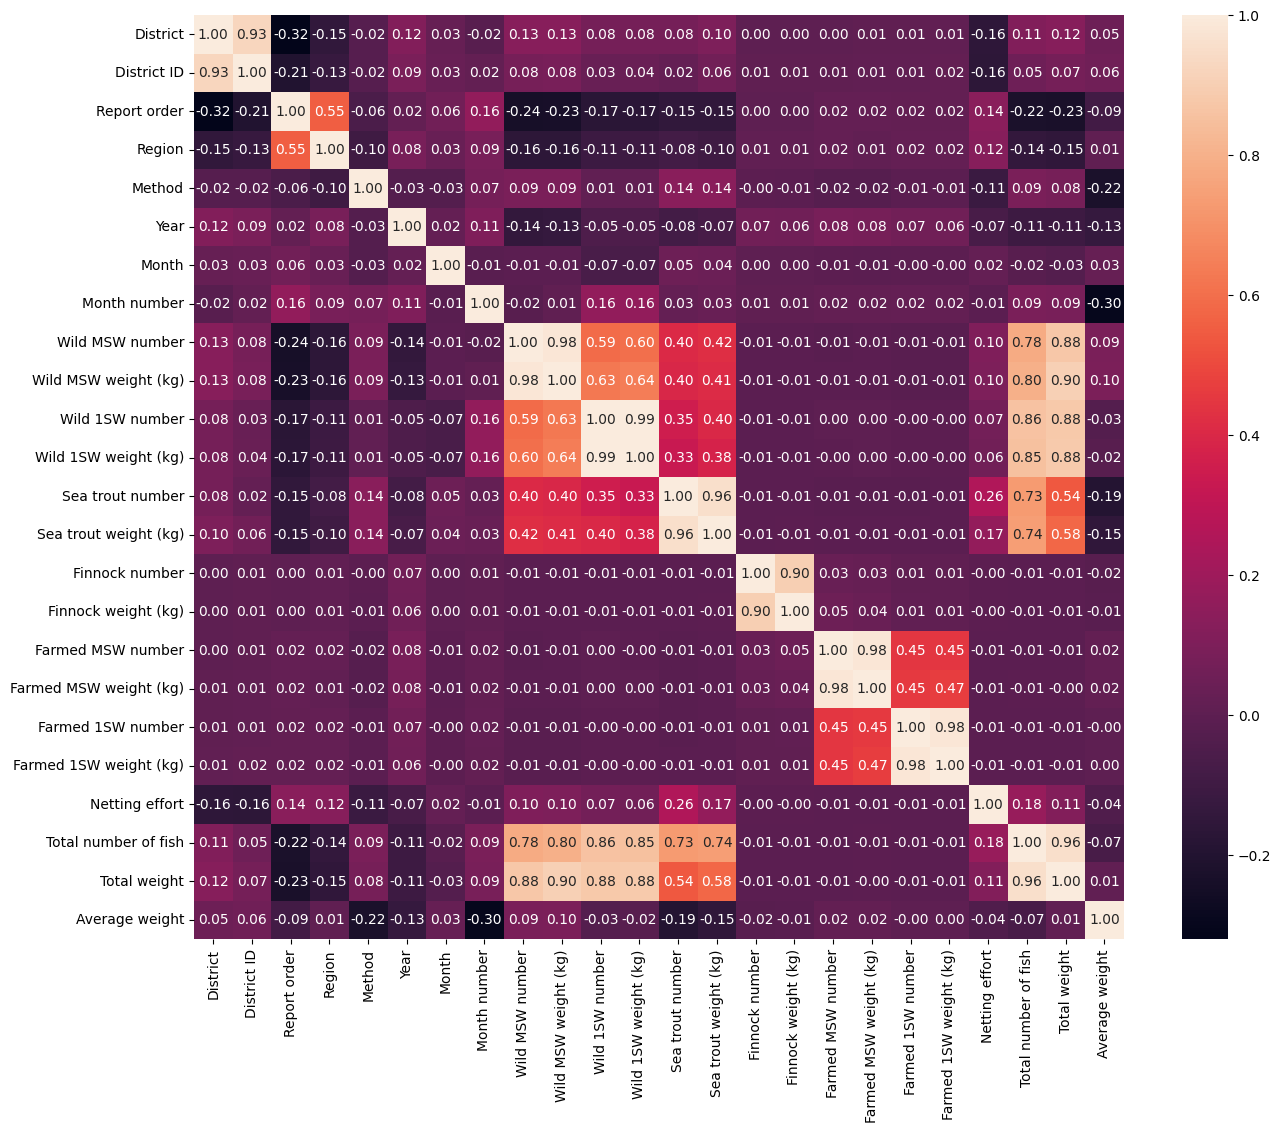

In [8]:
#Let's check how the correlation between the data looks like
correlation = dataframe.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, fmt=".2f")

In [9]:
#Let's check again if there are any missing data in the newly created columns (for example, when no fish were caught in a given month, resulting in division by zero and the average weight of a single fish being NaN)
dataframe.isnull().sum()

District                     0
District ID                  0
Report order                 0
Region                       0
Method                       0
Year                         0
Month                        0
Month number                 0
Wild MSW number              0
Wild MSW weight (kg)         0
Wild 1SW number              0
Wild 1SW weight (kg)         0
Sea trout number             0
Sea trout weight (kg)        0
Finnock number               0
Finnock weight (kg)          0
Farmed MSW number            0
Farmed MSW weight (kg)       0
Farmed 1SW number            0
Farmed 1SW weight (kg)       0
Netting effort               0
Total number of fish         0
Total weight                 0
Average weight            1249
dtype: int64

In [10]:
#We see that there are a lot of missing data, so let's fill them in with the average weight of fish
dataframe['Average weight'] = dataframe['Average weight'].fillna(dataframe['Average weight'].mean())

In [11]:
#Let's prepare the data for the models
X = dataframe.drop('Average weight', axis=1)
Y = dataframe['Average weight']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#We'll write a new function to train the model because we'll be using different evaluation metrics than in classification problem
def train_model(model, X_train, Y_train, X_test, Y_test):
    print('Training model... ')
    model.fit(X_train, Y_train)
    print('Model trained')

    predictions = model.predict(X_test)
    #To evaluate the model, we'll use mean squared error, root mean squared error, and R2 score
    mse = metrics.mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(Y_test, predictions)
   

    return [mse, rmse, r2]

In [13]:
#MODEL 1 - Linear Regression
linr_accuracy = train_model(LinearRegression(), X_train, Y_train, X_test, Y_test)
accuracy_comparison = {'Linear Regression' : linr_accuracy}
print('Linear Regression accuracy: ', linr_accuracy)

Training model... 
Model trained
Linear Regression accuracy:  [0.9650961265792072, 0.9823930611416223, 0.221401561665431]


In [14]:
#MODEL 2 - Random Forest
rfr_accuracy = train_model(RandomForestRegressor(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Random Forest'] = rfr_accuracy
print('Random Forest accuracy: ', rfr_accuracy)

Training model... 
Model trained
Random Forest accuracy:  [0.09067608420067623, 0.30112469875564213, 0.9268463983964129]


In [15]:
#MODEL 3 - Support Vector Machine
svr_accuracy = train_model(SVR(), X_train, Y_train, X_test, Y_test) #The linear kernel is taking too much time to train, so we'll use the default kernel instead
accuracy_comparison['Support Vector Machine'] = svr_accuracy
print('Support Vector Machine accuracy: ', svr_accuracy)

Training model... 
Model trained
Support Vector Machine accuracy:  [0.8098744869640451, 0.8999302678341501, 0.3466277675030499]


In [16]:
#MODEL 4 - Decision Tree
dtr_accuracy = train_model(DecisionTreeRegressor(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Decision Tree'] = dtr_accuracy
print('Decision Tree accuracy: ', dtr_accuracy)

Training model... 
Model trained
Decision Tree accuracy:  [0.19705301307451104, 0.4439065364178715, 0.8410260242233562]


In [17]:
#MODEL 5 - Neural Network
mlpr = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlpr_accuracy = train_model(mlpr, X_train, Y_train, X_test, Y_test)
accuracy_comparison['Neural Network'] = mlpr_accuracy
print('Neural Network accuracy: ', mlpr_accuracy)

Training model... 
Model trained
Neural Network accuracy:  [0.4527240385983891, 0.6728477083251374, 0.6347615333421448]


<Axes: >

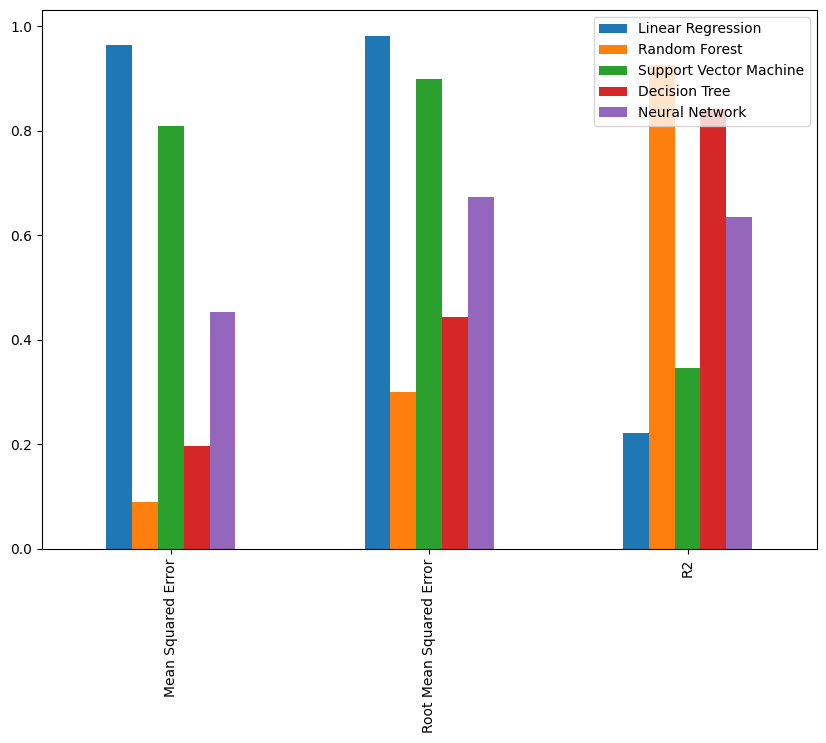

In [18]:
#Visualizing models results
accuracy_df = pd.DataFrame(accuracy_comparison, index=['Mean Squared Error', 'Root Mean Squared Error', 'R2'])
accuracy_df.plot(kind='bar', figsize=(10, 7))

As we can see in this problem, it's clear which models performed better than the rest. Random Forest achieved the highest percentage of result fitting (R2 score), followed by Decision Tree Forests and a simple neural network, which also performed well. We can also observe that linear regression and SVM, in their default configuration, did not handle this problem effectively, resulting in high mean squared error.

If you haven't checked out the classification problem, you can fing it in salmon-statistics-analysis-classification.ipynb file :D